**PROJECT : Prediction Using DECISION TREES MODEL**



*  AUTHOR : ANSHU SHARMA

* **GRIP THE SPARKS FOUNDATION**

*  **DATA AND BUISNESS ANALYTICS INTERN**









**OUTLINe: We are given a data set containing, several feature and we need to use decision tree algorithm for classifying for any  new given data. **

In [14]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

In [15]:
# importing the dataset
url ="/content/Iris.csv"
data = pd.read_csv(url)
print("data imported")
data.info()
data.head(10)

data imported
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa




1.   As we can see given dataset has no null values, so we don't have to do feature engineering for handling null values.
2.   We can also notice that the Species class that we have to classify according for data is given in same dataset, so we need to separate our input features (say x) and output/target variable(say y).


In [16]:
y = data.pop("Species")
z = data.pop("Id")
x = data

print(x.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object




*   Now since data is splitted into output and input variables. Now our task is to split this data for training and testing. For this we are gonna use train_test_split from sklearn Library.
*   List item



In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =9)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


# As our data is seperated into training sets and test sets, we can build model., and feed data into it.

In [18]:
#Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree = dtree.fit(x_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


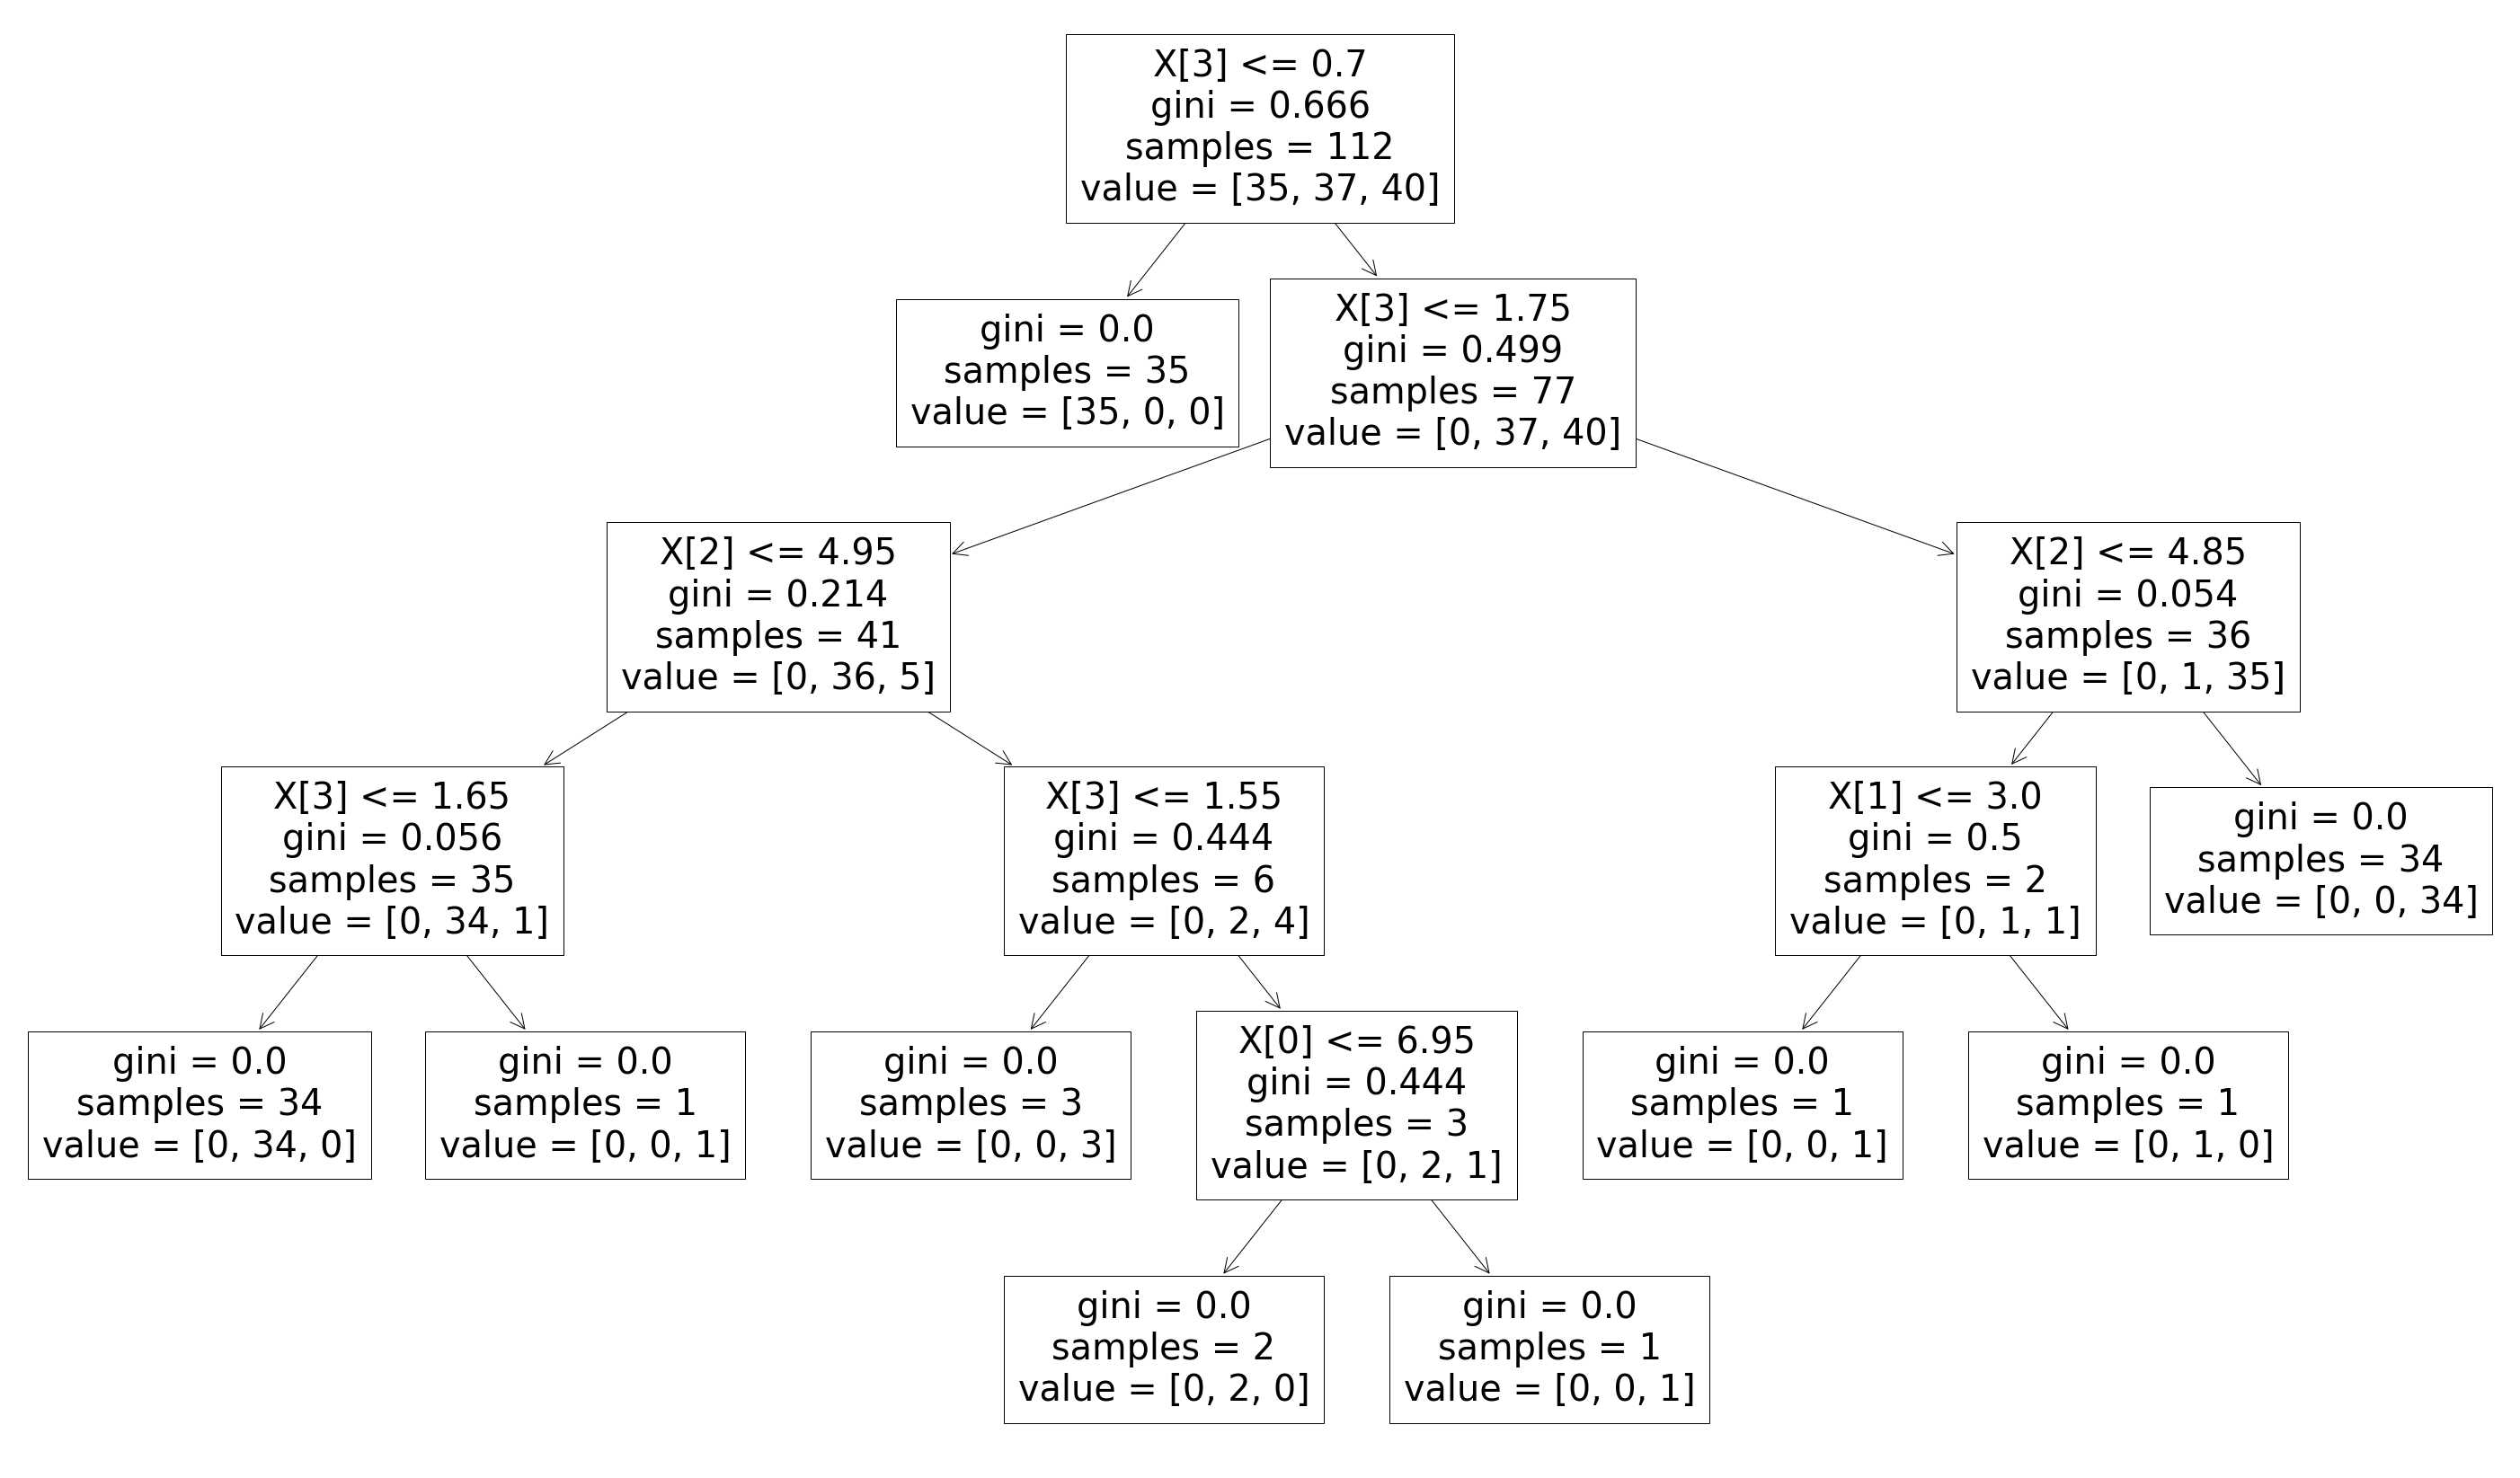

In [21]:
# Import tree from sklearn to visualize the tree
from sklearn import tree

# plot the Tree
plt.figure(figsize=(50,30))
tree.plot_tree(dtree, filled=False)
plt.show()

* The decision Tree choose to split on X[3] or the last input Feature which was 'petalwidthcm' because it was getting more pure child nodes as compared to the child node with the split on X[2] . Later, 'petallengthcm' was also used to split, and similarly for x[1] and x[0].


In [22]:
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(dtree, x_train, y_train, cv = 5, scoring = 'accuracy').mean()
print('For Decision Trees Classifier :', round(cv_dt,3))



For Decision Trees Classifier : 0.92


* As we can see cross validation score for our model(dtree) is 92% which is pretty good. Now we need to check it for test data as well.

In [23]:
from sklearn.metrics import accuracy_score

pred = dtree.predict(x_test)

str(round(accuracy_score(y_test, pred,  normalize=True, sample_weight=None) ))


'1'

As we can see Accuracy score for test data is coming out to be exceptionally well, with 100% accuracy.
The performance of the developed model is excellent, and it can be deployed to predict future classes of species.